In [22]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import linregress


In [2]:
# Friendliness, Reliance On Display, Helpfulness of Display
three_ball_none = [[3,2,1,3], [1,1,1,1], [1,1,1,1]]
three_ball_arrow = [[3,2,2,1], [7,6,6,7], [7,6,6,6]]
three_ball_eyes = [[6,7,5,6], [7,7,7,6], [7,6,6,5]]
three_ball_text  = [[2,1,1,2], [4,5,7,4], [5,4,6,3]]

five_ball_none = [[3,3,2,2], [1,1,1,1], [1,1,1,1]]
five_ball_arrow = [[3,3,3,3], [7,6,5,6], [6,6,7,6]]
five_ball_eyes = [[6,6,5,6], [6,5,5,6], [7,7,6,7]]
five_ball_text  = [[2,1,1,2], [4,5,3,4], [4,5,4,4]]

seven_ball_none = [[3,2,2,3], [1,1,1,1], [1,1,1,1]]
seven_ball_arrow = [[3,2,2,3], [5,4,5,6], [5,5,4,5]]
seven_ball_eyes = [[6,6,5,6], [7,6,7,7], [7,6,7,6]]
seven_ball_text  = [[2,1,1,2], [6,5,6,5], [7,6,6,5]]

# Load 3-ball CSVs
df_3b_none = pd.read_csv('3b_none.csv')
df_3b_arrow = pd.read_csv('3b_arrow.csv')
df_3b_eyes = pd.read_csv('3b_eyes.csv')
df_3b_text = pd.read_csv('3b_text.csv')

# Load 5-ball CSVs
df_5b_none = pd.read_csv('5b_none.csv')
df_5b_arrow = pd.read_csv('5b_arrow.csv')
df_5b_eyes = pd.read_csv('5b_eyes.csv')
df_5b_text = pd.read_csv('5b_text.csv')

# Load 7-ball CSVs
df_7b_none = pd.read_csv('7b_none.csv')
df_7b_arrow = pd.read_csv('7b_arrow.csv')
df_7b_eyes = pd.read_csv('7b_eyes.csv')
df_7b_text = pd.read_csv('7b_text.csv')

In [3]:
df_7b_eyes.head()

,trial,video,key,reaction_time,correct,speed
0,1,./7Ball/7Ball_Eyes1.mp4,1,1.294,True,0.8
1,2,./7Ball/7Ball_Eyes2.mp4,2,3.063,True,0.8
2,3,./7Ball/7Ball_Eyes4.mp4,4,2.448,True,0.8
3,4,./7Ball/7Ball_Eyes3.mp4,3,2.545,True,0.8
4,5,./7Ball/7Ball_Eyes4.mp4,4,2.584,True,0.8


C:\Users\ruiwe\AppData\Local\Temp\ipykernel_82364\1651195182.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=trial_counts, patch_artist=True,


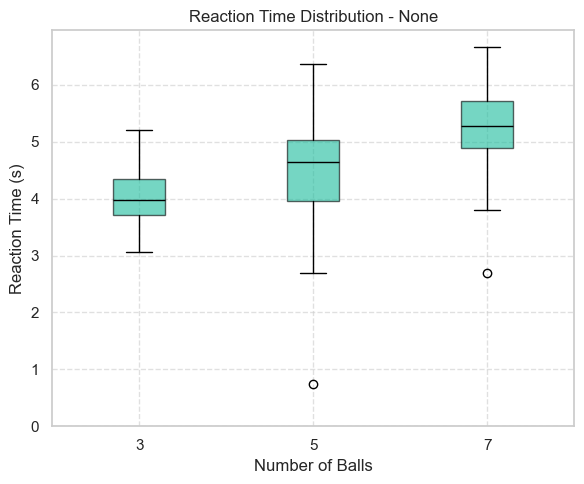

C:\Users\ruiwe\AppData\Local\Temp\ipykernel_82364\1651195182.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=trial_counts, patch_artist=True,


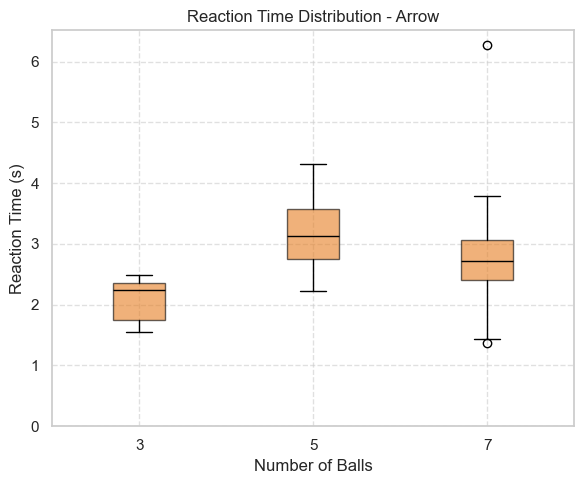

C:\Users\ruiwe\AppData\Local\Temp\ipykernel_82364\1651195182.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=trial_counts, patch_artist=True,


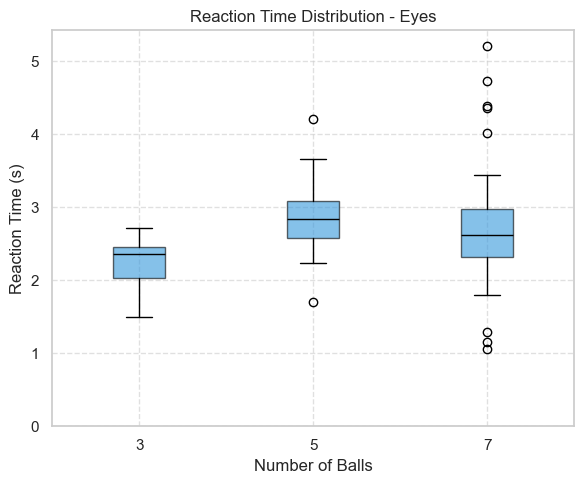

C:\Users\ruiwe\AppData\Local\Temp\ipykernel_82364\1651195182.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=trial_counts, patch_artist=True,


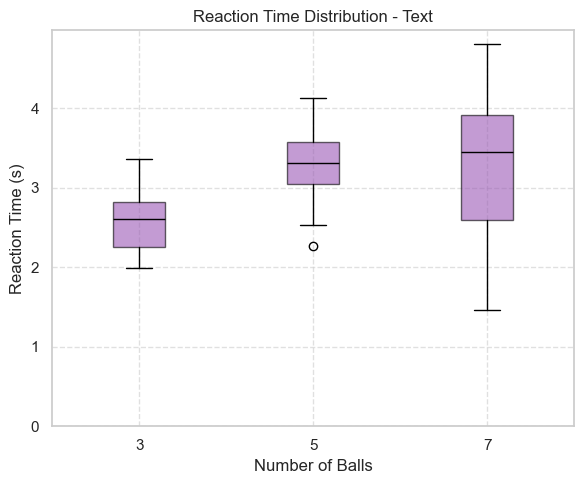

In [13]:
# Map trial counts to dataframes for each display type
reaction_data = {
    "none": [df_3b_none["reaction_time"], df_5b_none["reaction_time"], df_7b_none["reaction_time"]],
    "arrow": [df_3b_arrow["reaction_time"], df_5b_arrow["reaction_time"], df_7b_arrow["reaction_time"]],
    "eyes": [df_3b_eyes["reaction_time"], df_5b_eyes["reaction_time"], df_7b_eyes["reaction_time"]],
    "text": [df_3b_text["reaction_time"], df_5b_text["reaction_time"], df_7b_text["reaction_time"]]
}

trial_counts = [3, 5, 7]

# Updated color palette
colors = {
    "none": "#1ABC9C",   # teal
    "arrow": "#E67E22",  # orange
    "eyes": "#3498DB",   # blue
    "text": "#9B59B6"    # magenta
}

# Generate separate boxplots for each display type
for dtype, data in reaction_data.items():
    plt.figure(figsize=(6,5))
    plt.boxplot(data, labels=trial_counts, patch_artist=True,
                boxprops=dict(facecolor=colors[dtype], alpha=0.6),
                medianprops=dict(color='black'))
    plt.title(f"Reaction Time Distribution - {dtype.capitalize()}")
    plt.xlabel("Number of Balls")
    plt.ylabel("Reaction Time (s)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.show()

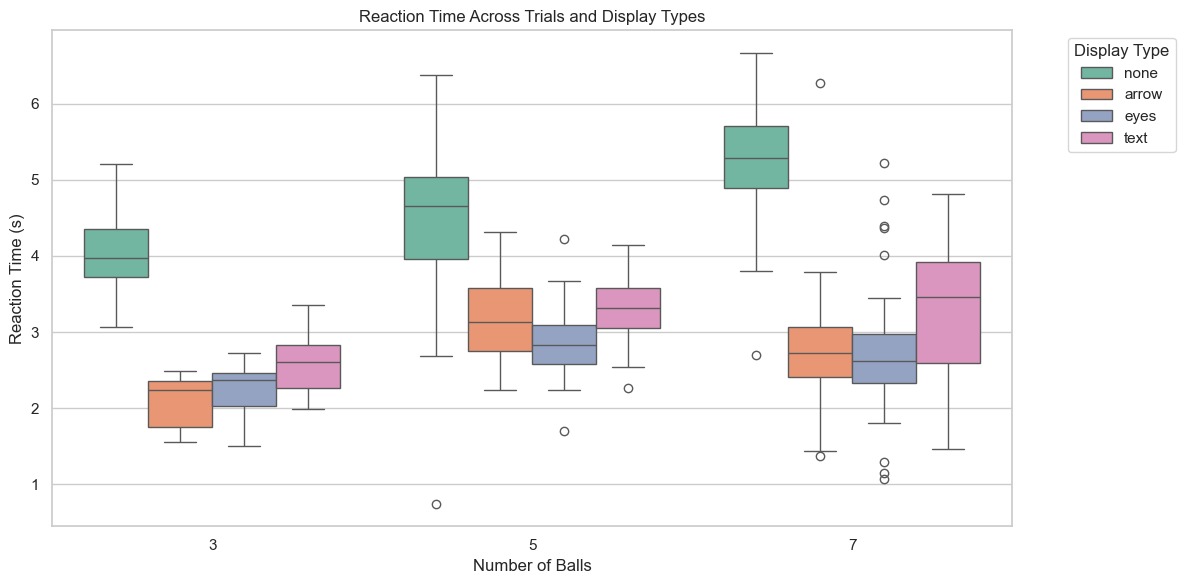

In [11]:
trial_counts = [3, 5, 7]
display_types = ["none", "arrow", "eyes", "text"]

# Collect all reaction time data into a single DataFrame
data_list = []

for dtype in display_types:
    dfs = {
        "none": [df_3b_none, df_5b_none, df_7b_none],
        "arrow": [df_3b_arrow, df_5b_arrow, df_7b_arrow],
        "eyes": [df_3b_eyes, df_5b_eyes, df_7b_eyes],
        "text": [df_3b_text, df_5b_text, df_7b_text]
    }
    for trial_num, df_trial in zip(trial_counts, dfs[dtype]):
        temp_df = pd.DataFrame({
            "Reaction Time": df_trial["reaction_time"],
            "Balls": trial_num,
            "Display Type": dtype
        })
        data_list.append(temp_df)

long_df = pd.concat(data_list, ignore_index=True)

# -----------------------------
# Plot
# -----------------------------
sns.set(style="whitegrid")  # nicer background
palette = sns.color_palette("Set2", n_colors=4)  # pleasing 4-color palette

plt.figure(figsize=(12,6))
sns.boxplot(x="Balls", y="Reaction Time", hue="Display Type", data=long_df,
            palette=palette)

plt.title("Reaction Time Across Trials and Display Types")
plt.xlabel("Number of Balls")
plt.ylabel("Reaction Time (s)")
plt.legend(title="Display Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

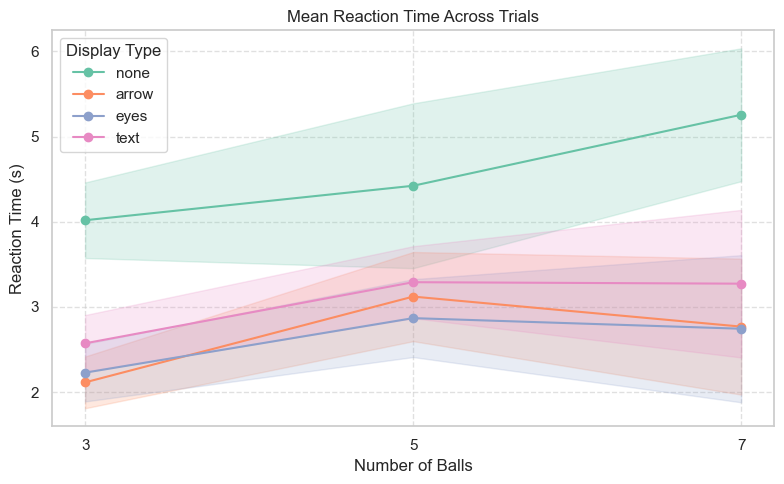

In [12]:
# Use the same Seaborn Set2 palette
palette = sns.color_palette("Set2", n_colors=4)
colors = dict(zip(display_types, palette))

# Compute mean reaction times
mean_rt = {
    "none": [df_3b_none["reaction_time"].mean(),
             df_5b_none["reaction_time"].mean(),
             df_7b_none["reaction_time"].mean()],
    "arrow": [df_3b_arrow["reaction_time"].mean(),
              df_5b_arrow["reaction_time"].mean(),
              df_7b_arrow["reaction_time"].mean()],
    "eyes": [df_3b_eyes["reaction_time"].mean(),
             df_5b_eyes["reaction_time"].mean(),
             df_7b_eyes["reaction_time"].mean()],
    "text": [df_3b_text["reaction_time"].mean(),
             df_5b_text["reaction_time"].mean(),
             df_7b_text["reaction_time"].mean()]
}

# Optional: standard deviation for shaded error bands
std_rt = {
    "none": [df_3b_none["reaction_time"].std(),
             df_5b_none["reaction_time"].std(),
             df_7b_none["reaction_time"].std()],
    "arrow": [df_3b_arrow["reaction_time"].std(),
              df_5b_arrow["reaction_time"].std(),
              df_7b_arrow["reaction_time"].std()],
    "eyes": [df_3b_eyes["reaction_time"].std(),
             df_5b_eyes["reaction_time"].std(),
             df_7b_eyes["reaction_time"].std()],
    "text": [df_3b_text["reaction_time"].std(),
             df_5b_text["reaction_time"].std(),
             df_7b_text["reaction_time"].std()]
}

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(8,5))
for dtype in display_types:
    plt.plot(trial_counts, mean_rt[dtype], marker='o', color=colors[dtype], label=dtype)
    plt.fill_between(trial_counts,
                     np.array(mean_rt[dtype]) - np.array(std_rt[dtype]),
                     np.array(mean_rt[dtype]) + np.array(std_rt[dtype]),
                     color=colors[dtype], alpha=0.2)

plt.title("Mean Reaction Time Across Trials")
plt.xlabel("Number of Balls")
plt.ylabel("Reaction Time (s)")
plt.xticks(trial_counts)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Display Type")
plt.tight_layout()
plt.show()

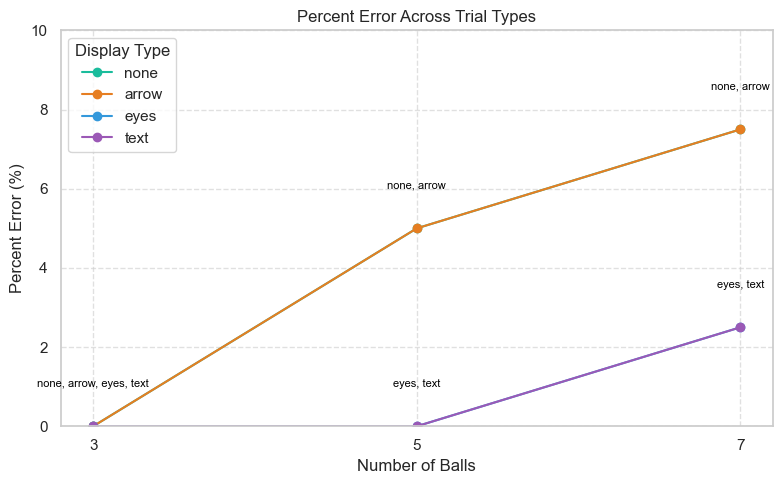

In [15]:
def percent_error(df):
    return 100 * (1 - df["correct"].mean())

error_data = {
    "none": [
        percent_error(df_3b_none),
        percent_error(df_5b_none),
        percent_error(df_7b_none)
    ],
    "arrow": [
        percent_error(df_3b_arrow),
        percent_error(df_5b_arrow),
        percent_error(df_7b_arrow)
    ],
    "eyes": [
        percent_error(df_3b_eyes),
        percent_error(df_5b_eyes),
        percent_error(df_7b_eyes)
    ],
    "text": [
        percent_error(df_3b_text),
        percent_error(df_5b_text),
        percent_error(df_7b_text)
    ]
}

# Plot % error with consistent colors
plt.figure(figsize=(8,5))
for dtype, errors in error_data.items():
    plt.plot(trial_counts, errors, marker='o', color=colors[dtype], label=dtype)
    
# Annotate overlapping points
for i, x in enumerate(trial_counts):
    # Collect values for all display types at this trial count
    vals = [error_data[d][i] for d in error_data]
    duplicates = {}
    for d, v in zip(error_data.keys(), vals):
        duplicates.setdefault(v, []).append(d)
    # Add annotation if more than one line shares the same y-value
    for y_val, group in duplicates.items():
        if len(group) > 1:
            plt.text(x, y_val + 1, ", ".join(group), ha='center', fontsize=8, color='black')

plt.title("Percent Error Across Trial Types")
plt.xlabel("Number of Balls")
plt.ylabel("Percent Error (%)")
plt.xticks(trial_counts)
plt.ylim(0, 10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Display Type")
plt.tight_layout()
plt.show()

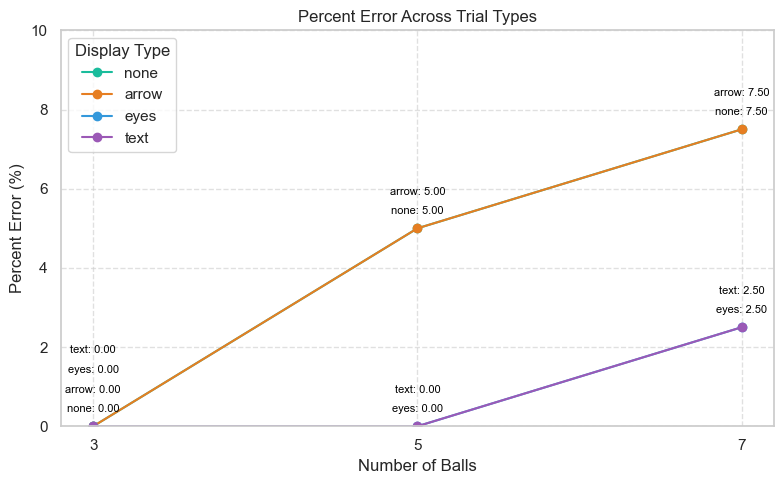

In [29]:
plt.figure(figsize=(8,5))
for dtype, errors in error_data.items():
    plt.plot(trial_counts, errors, marker='o', color=colors[dtype], label=dtype)
    
# Annotate each point, handling overlapping y-values
for i, x in enumerate(trial_counts):
    # Collect values for all display types at this trial count
    vals = [error_data[d][i] for d in error_data]
    duplicates = {}
    for d, v in zip(error_data.keys(), vals):
        duplicates.setdefault(v, []).append(d)
    
    for y_val, group in duplicates.items():
        # Adjust vertical offset depending on number of overlapping points
        for j, d in enumerate(group):
            offset = 0.5 * j  # spacing between stacked labels
            plt.text(x, y_val + offset + 0.3, f"{d}: {y_val:.2f}", 
                     ha='center', va='bottom', fontsize=8, color='black')

plt.title("Percent Error Across Trial Types")
plt.xlabel("Number of Balls")
plt.ylabel("Percent Error (%)")
plt.xticks(trial_counts)
plt.ylim(0, 10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Display Type")
plt.tight_layout()
plt.show()

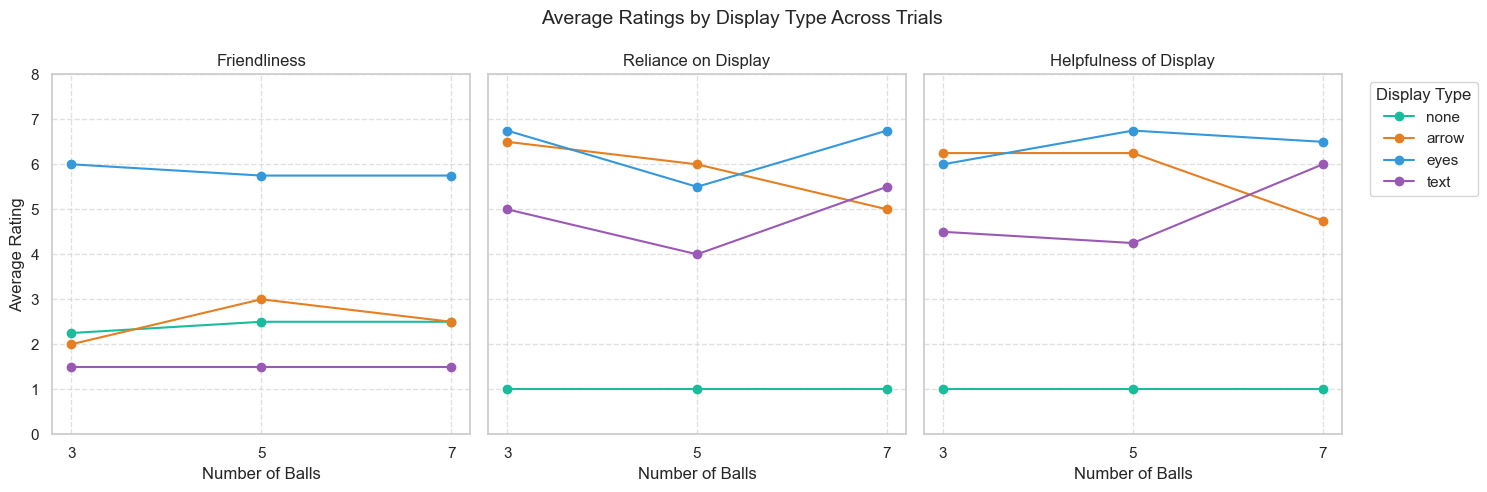

In [16]:
def avg(values):
    return np.mean(values, axis=1)  # average across participants per category

def trial_means(none, arrow, eyes, text):
    return {
        "none": avg(none),
        "arrow": avg(arrow),
        "eyes": avg(eyes),
        "text": avg(text)
    }

# Compute means for each trial count
means_3b = trial_means(three_ball_none, three_ball_arrow, three_ball_eyes, three_ball_text)
means_5b = trial_means(five_ball_none, five_ball_arrow, five_ball_eyes, five_ball_text)
means_7b = trial_means(seven_ball_none, seven_ball_arrow, seven_ball_eyes, seven_ball_text)

# -----------------------------
# Organize for plotting
# -----------------------------
categories = ["Friendliness", "Reliance on Display", "Helpfulness of Display"]
trial_counts = [3, 5, 7]
display_types = ["none", "arrow", "eyes", "text"]

# Updated color palette
colors = {
    "none": "#1ABC9C",   # teal
    "arrow": "#E67E22",  # orange
    "eyes": "#3498DB",   # blue
    "text": "#9B59B6"    # magenta
}

# Gather mean scores by category and display type
mean_data = {dtype: [] for dtype in display_types}
for dtype in display_types:
    mean_data[dtype] = [
        [means_3b[dtype][i], means_5b[dtype][i], means_7b[dtype][i]]
        for i in range(3)
    ]

# -----------------------------
# Plot
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, category in enumerate(categories):
    ax = axes[i]
    for dtype in display_types:
        ax.plot(trial_counts, mean_data[dtype][i], marker='o', label=dtype, color=colors[dtype])
    ax.set_title(category)
    ax.set_xlabel("Number of Balls")
    if i == 0:
        ax.set_ylabel("Average Rating")
    ax.set_xticks(trial_counts)
    ax.set_ylim(0, 8)
    ax.grid(True, linestyle="--", alpha=0.6)

axes[2].legend(title="Display Type", bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle("Average Ratings by Display Type Across Trials", fontsize=14)
plt.tight_layout()
plt.show()

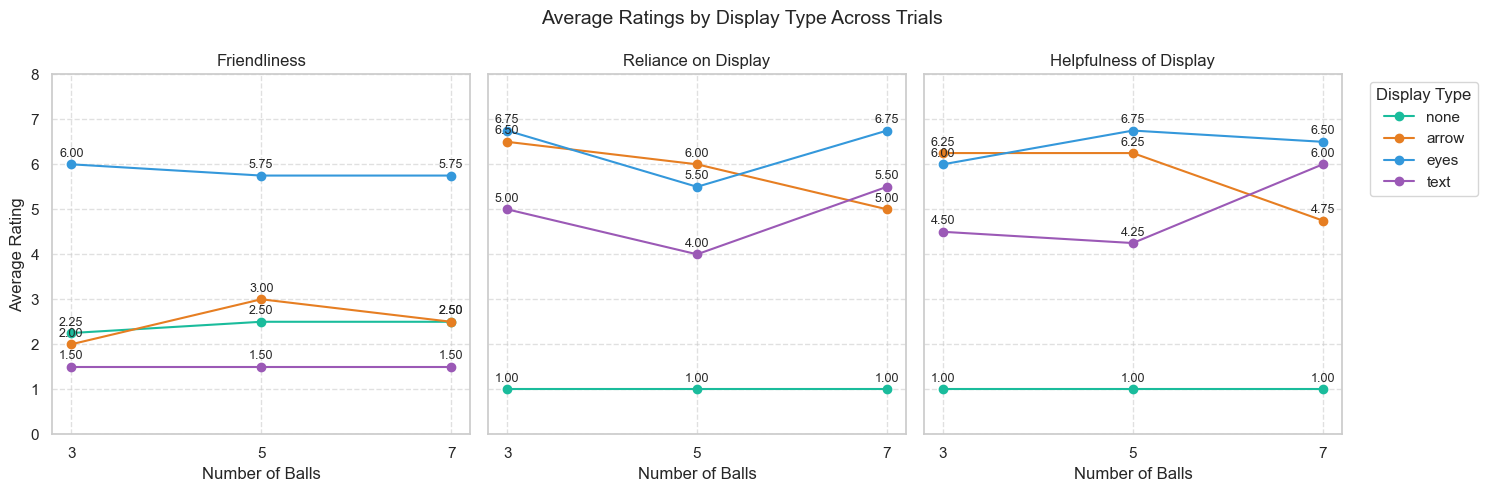

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, category in enumerate(categories):
    ax = axes[i]
    for dtype in display_types:
        y_values = mean_data[dtype][i]
        ax.plot(trial_counts, y_values, marker='o', label=dtype, color=colors[dtype])
        
        # Add numeric labels to each point
        for x, y in zip(trial_counts, y_values):
            ax.text(x, y + 0.1, f"{y:.2f}", ha='center', va='bottom', fontsize=9)

    ax.set_title(category)
    ax.set_xlabel("Number of Balls")
    if i == 0:
        ax.set_ylabel("Average Rating")
    ax.set_xticks(trial_counts)
    ax.set_ylim(0, 8)
    ax.grid(True, linestyle="--", alpha=0.6)

axes[2].legend(title="Display Type", bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle("Average Ratings by Display Type Across Trials", fontsize=14)
plt.tight_layout()
plt.show()

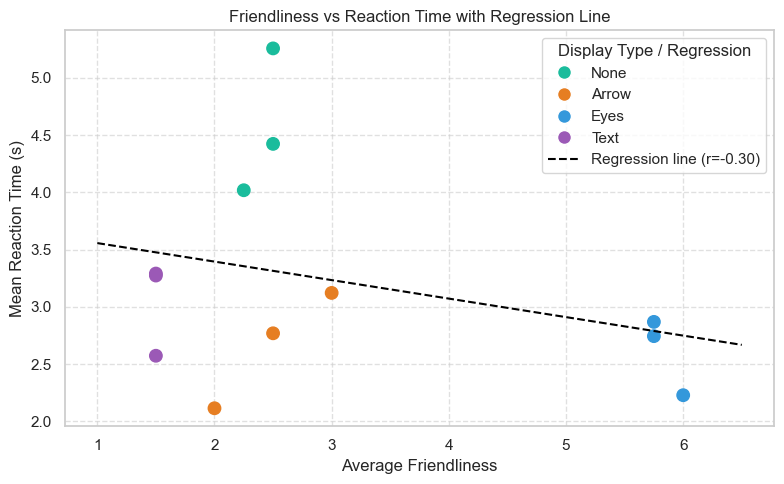

In [23]:
x_all = []
y_all = []
colors_all = []

display_types = ["none", "arrow", "eyes", "text"]
color_map = {
    "none": "#1ABC9C",   # teal
    "arrow": "#E67E22",  # orange
    "eyes": "#3498DB",   # blue
    "text": "#9B59B6"    # magenta
}

for dtype in display_types:
    x_all.extend(mean_data[dtype][0])  # Friendliness
    y_all.extend(mean_rt[dtype])       # Reaction Time
    colors_all.extend([color_map[dtype]] * 3)  # 3 trials per type

x_all = np.array(x_all)
y_all = np.array(y_all)

# Regression line (all points together)
slope, intercept, r_value, p_value, std_err = linregress(x_all, y_all)
x_fit = np.linspace(min(x_all)-0.5, max(x_all)+0.5, 100)
y_fit = slope * x_fit + intercept

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(8,5))
plt.scatter(x_all, y_all, c=colors_all, s=80)

plt.plot(x_fit, y_fit, color='black', linestyle='--', label=f"Regression line (r={r_value:.2f})")

plt.xlabel("Average Friendliness")
plt.ylabel("Mean Reaction Time (s)")
plt.title("Friendliness vs Reaction Time with Regression Line")
plt.grid(True, linestyle="--", alpha=0.6)

# Legend: one entry per display type (color) + regression line
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[d], markersize=10, label=d.capitalize())
                   for d in display_types]
legend_elements.append(Line2D([0], [0], color='black', linestyle='--', label=f"Regression line (r={r_value:.2f})"))

plt.legend(handles=legend_elements, title="Display Type / Regression")
plt.tight_layout()
plt.show()

In [24]:
mean_reaction_times = {
    "none": [df_3b_none["reaction_time"].mean(),
             df_5b_none["reaction_time"].mean(),
             df_7b_none["reaction_time"].mean()],
    "arrow": [df_3b_arrow["reaction_time"].mean(),
              df_5b_arrow["reaction_time"].mean(),
              df_7b_arrow["reaction_time"].mean()],
    "eyes": [df_3b_eyes["reaction_time"].mean(),
             df_5b_eyes["reaction_time"].mean(),
             df_7b_eyes["reaction_time"].mean()],
    "text": [df_3b_text["reaction_time"].mean(),
             df_5b_text["reaction_time"].mean(),
             df_7b_text["reaction_time"].mean()]
}

# Turn into a DataFrame for easy viewing
mean_df = pd.DataFrame(mean_reaction_times, index=["3-ball", "5-ball", "7-ball"])
print(mean_df)

            none     arrow      eyes      text
3-ball  4.018550  2.114800  2.228775  2.573250
5-ball  4.423325  3.121950  2.869050  3.291025
7-ball  5.257025  2.769375  2.744500  3.273650


In [25]:
from scipy.stats import f_oneway

comparisons = {
    "3-ball": {
        "none vs arrow": f_oneway(df_3b_none["reaction_time"], df_3b_arrow["reaction_time"]),
        "none vs eyes":  f_oneway(df_3b_none["reaction_time"], df_3b_eyes["reaction_time"]),
        "none vs text":  f_oneway(df_3b_none["reaction_time"], df_3b_text["reaction_time"])
    },
    "5-ball": {
        "none vs arrow": f_oneway(df_5b_none["reaction_time"], df_5b_arrow["reaction_time"]),
        "none vs eyes":  f_oneway(df_5b_none["reaction_time"], df_5b_eyes["reaction_time"]),
        "none vs text":  f_oneway(df_5b_none["reaction_time"], df_5b_text["reaction_time"])
    },
    "7-ball": {
        "none vs arrow": f_oneway(df_7b_none["reaction_time"], df_7b_arrow["reaction_time"]),
        "none vs eyes":  f_oneway(df_7b_none["reaction_time"], df_7b_eyes["reaction_time"]),
        "none vs text":  f_oneway(df_7b_none["reaction_time"], df_7b_text["reaction_time"])
    }
}

# Print results neatly
for trial, tests in comparisons.items():
    print(f"\n{trial}:")
    for label, (f_val, p_val) in tests.items():
        print(f"  {label}: F = {f_val:.3f}, p = {p_val:.4f}")


3-ball:
  none vs arrow: F = 501.325, p = 0.0000
  none vs eyes: F = 411.830, p = 0.0000
  none vs text: F = 272.092, p = 0.0000

5-ball:
  none vs arrow: F = 55.939, p = 0.0000
  none vs eyes: F = 84.316, p = 0.0000
  none vs text: F = 45.969, p = 0.0000

7-ball:
  none vs arrow: F = 198.698, p = 0.0000
  none vs eyes: F = 186.352, p = 0.0000
  none vs text: F = 115.776, p = 0.0000


In [26]:
anova_excl_none = {}

anova_excl_none["3-ball"] = f_oneway(
    df_3b_arrow["reaction_time"],
    df_3b_eyes["reaction_time"],
    df_3b_text["reaction_time"]
)

anova_excl_none["5-ball"] = f_oneway(
    df_5b_arrow["reaction_time"],
    df_5b_eyes["reaction_time"],
    df_5b_text["reaction_time"]
)

anova_excl_none["7-ball"] = f_oneway(
    df_7b_arrow["reaction_time"],
    df_7b_eyes["reaction_time"],
    df_7b_text["reaction_time"]
)

for trial, (f_val, p_val) in anova_excl_none.items():
    print(f"{trial}: F = {f_val:.3f}, p = {p_val:.4f}")

3-ball: F = 21.556, p = 0.0000
5-ball: F = 8.179, p = 0.0005
7-ball: F = 5.013, p = 0.0082


In [27]:
from scipy.stats import ttest_ind

# t-test: Arrow vs Eyes per trial
t_results = {}

t_results["3-ball"] = ttest_ind(df_3b_arrow["reaction_time"], df_3b_eyes["reaction_time"], equal_var=False)
t_results["5-ball"] = ttest_ind(df_5b_arrow["reaction_time"], df_5b_eyes["reaction_time"], equal_var=False)
t_results["7-ball"] = ttest_ind(df_7b_arrow["reaction_time"], df_7b_eyes["reaction_time"], equal_var=False)

for trial, result in t_results.items():
    print(f"{trial}: t = {result.statistic:.3f}, p = {result.pvalue:.4f}")

3-ball: t = -1.585, p = 0.1170
5-ball: t = 2.301, p = 0.0241
7-ball: t = 0.134, p = 0.8940


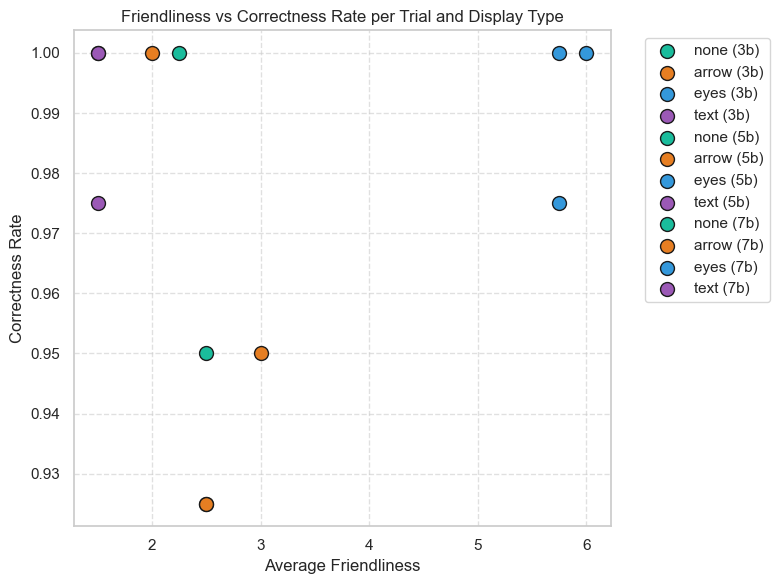

In [30]:
dfs = {
    "3b": {"none": df_3b_none, "arrow": df_3b_arrow, "eyes": df_3b_eyes, "text": df_3b_text},
    "5b": {"none": df_5b_none, "arrow": df_5b_arrow, "eyes": df_5b_eyes, "text": df_5b_text},
    "7b": {"none": df_7b_none, "arrow": df_7b_arrow, "eyes": df_7b_eyes, "text": df_7b_text}
}

# Average Friendliness from your list datasets
friendliness_data = {
    "3b": {
        "none": np.mean(three_ball_none, axis=1)[0],   # Friendliness is first row
        "arrow": np.mean(three_ball_arrow, axis=1)[0],
        "eyes": np.mean(three_ball_eyes, axis=1)[0],
        "text": np.mean(three_ball_text, axis=1)[0]
    },
    "5b": {
        "none": np.mean(five_ball_none, axis=1)[0],
        "arrow": np.mean(five_ball_arrow, axis=1)[0],
        "eyes": np.mean(five_ball_eyes, axis=1)[0],
        "text": np.mean(five_ball_text, axis=1)[0]
    },
    "7b": {
        "none": np.mean(seven_ball_none, axis=1)[0],
        "arrow": np.mean(seven_ball_arrow, axis=1)[0],
        "eyes": np.mean(seven_ball_eyes, axis=1)[0],
        "text": np.mean(seven_ball_text, axis=1)[0]
    }
}

# Compute correctness rate per CSV (mean of 'correct' column)
correctness = {}
for trial, trial_dfs in dfs.items():
    correctness[trial] = {}
    for dtype, df in trial_dfs.items():
        correctness[trial][dtype] = df['correct'].mean()  # fraction correct

# Plot scatter
plt.figure(figsize=(8,6))
for trial in ["3b", "5b", "7b"]:
    for dtype in ["none", "arrow", "eyes", "text"]:
        x = friendliness_data[trial][dtype]
        y = correctness[trial][dtype]
        plt.scatter(x, y, color=color_map[dtype], s=100, edgecolor='k', label=f"{dtype} ({trial})")

# Remove duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05,1), loc='upper left')

plt.xlabel("Average Friendliness")
plt.ylabel("Correctness Rate")
plt.title("Friendliness vs Correctness Rate per Trial and Display Type")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()